<a href="https://colab.research.google.com/github/theresiasns/MachineLearning/blob/main/NN_Crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Crop/Crop_recommendation.csv')

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(y.unique())
np.save('/content/drive/MyDrive/crop/crop_recommend_name.npy',y)
print(y)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [ ]:
# Encode the categorical labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)

        N    P    K  temperature   humidity        ph    rainfall
1656   17   16   14    16.396243  92.181519  6.625539  102.944161
752    37   79   19    27.543848  69.347863  7.143943   69.408782
892     7   73   25    27.521856  63.132153  7.288057   45.208411
1041  101   70   48    25.360592  75.031933  6.012697  116.553145
1179    0   17   30    35.474783  47.972305  6.279134   97.790725
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1760 rows x 7 columns]
[16  2 10 ... 12  7 10]


In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32, verbose=1)


Epoch 1/500
55/55 [==============================] - 2s 11ms/step - loss: 2.2879 - accuracy: 0.5699 - val_loss: 0.5137 - val_accuracy: 0.8273
Epoch 2/500
55/55 [==============================] - 0s 6ms/step - loss: 0.3996 - accuracy: 0.8591 - val_loss: 0.2824 - val_accuracy: 0.9045
Epoch 3/500
55/55 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.9165 - val_loss: 0.3327 - val_accuracy: 0.8886
Epoch 4/500
55/55 [==============================] - 0s 6ms/step - loss: 0.2476 - accuracy: 0.9136 - val_loss: 0.2272 - val_accuracy: 0.9182
Epoch 5/500
55/55 [==============================] - 0s 5ms/step - loss: 0.2079 - accuracy: 0.9358 - val_loss: 0.2351 - val_accuracy: 0.8977
Epoch 6/500
55/55 [==============================] - 0s 5ms/step - loss: 0.1733 - accuracy: 0.9426 - val_loss: 0.1894 - val_accuracy: 0.9182
Epoch 7/500
55/55 [==============================] - 0s 5ms/step - loss: 0.3857 - accuracy: 0.9301 - val_loss: 0.2203 - val_accuracy: 0.9182
Epoch 8/500


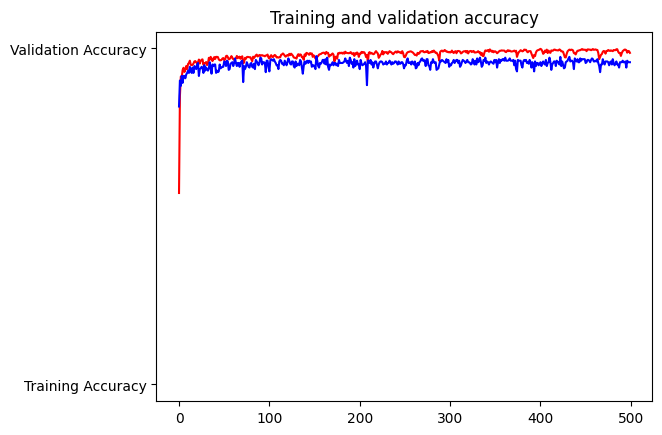

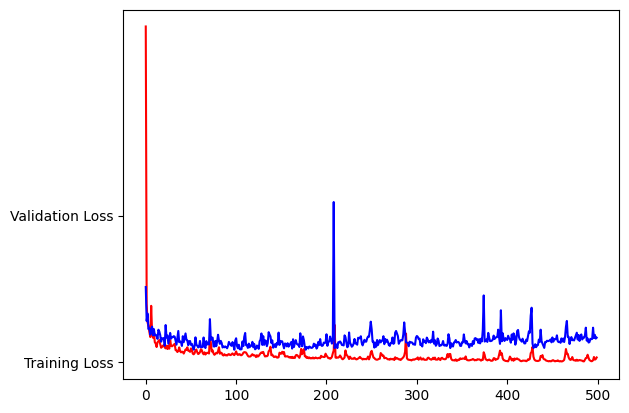

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
new_input = np.array([[3,58,41,21.77046169,80.31964408,7.038096361,226]])
predicted_label = np.argmax(model.predict(new_input), axis=-1)
predicted_crop = label_encoder.inverse_transform(predicted_label)
print("Predicted Crop:", predicted_crop)
print("Predicted Crop:", predicted_label)

1/1 [==============================] - 0s 96ms/step
Predicted Crop: ['papaya']
Predicted Crop: [17]


In [ ]:
export = '/content/drive/MyDrive/crop'
tf.saved_model.save(model, export)

In [ ]:
# Select mode of optimization
mode = "Storage"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert();


In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

41272

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Save model weights and architecture
model.save_weights('/content/drive/MyDrive/crop/crop_predict_weights.h5')
model.save('/content/drive/MyDrive/crop/Crop_predict.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load model architectur
loaded_model = load_model('/content/drive/MyDrive/crop/Crop_predict.h5')

# Load model weights
loaded_model.load_weights('/content/drive/MyDrive/crop/crop_predict_weights.h5')


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 22)                2838      
                                                                 
Total params: 37,782
Trainable params: 37,782
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_input = np.array([[94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949]])
predicted_label = np.argmax(loaded_model.predict(new_input), axis=-1)
predicted_crop = label_encoder.inverse_transform(predicted_label)
print("Predicted Crop:", predicted_crop)
print("Predicted Crop:", predicted_label)

1/1 [==============================] - 0s 29ms/step
Predicted Crop: ['rice']
Predicted Crop: [20]
